## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

#### Atividade 1 - 11/08/2025

**Aluno:**

---

Consideraremos para esta atividade o _dataset_ _tips_. A critério do aluno, a utilização da base de dados será dada em duas formas:

1 - Carregando o arquivo [_tips.csv_](https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/tips.csv)  
**ou**  
2 - Carregando da biblioteca **seaborn** (conferir a instalação da *library*).
```
import seaborn as sns
tips = sns.load_dataset("tips")
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Item 1** - Carregue o conjunto de dados e exiba as 5 primeiras, 5 últimas linhas e 3 linhas aleatórias. Descreva o que cada coluna representa e o tipo de dado esperado.

In [ ]:
import pandas as pd

# carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tips.csv")

print(dados.head()) # por padrão, é lido 5 primeiras linhas

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**Item 2** - Listando a tipagem de cada coluna, classifique-as como numérica, categórica nominal ou categórica ordinal. Justifique sua classificação em texto.

total_bill --> Numérico intervalar, pois é um valor  valor monetário total da conta.
tip --> Numérico intervalar, pois representa um valor total valor monetário da gorjeta.
sex --> Categórica nominal, pois são categorias sem ordem.
smoker --> Categórica nominal, pois são categorias sem ordem.
day --> Categórica ordinal, pois são categorias com ordem.
time --> Categórica ordinal, pois são categorias com ordem.
size --> Numérico racional, pois é uma contagem de pessoas.


**Item 3** - Escolha uma coluna categórica e:  
    - Conte a frequência de cada categoria.  
    - Apresente o resultado em formato de tabela e de gráfico de barras.  
    - Escreva um pequeno texto descrevendo os resultados.

In [ ]:
# Contagem como tabela
tabela_freq = dados["sex"].value_counts().reset_index()

# Renomear as colunas
tabela_freq.columns = ["Sexo", "Frequência"]

print(tabela_freq)

     Sexo  Frequência
0    Male         157
1  Female          87


A tabela indica que a palavra "Male" aparece 157 vezes e a "Female" aparece 87 vezes, tendo significado que tiveram 157 pessoas do gênero masculino e 87 pessoas do gênero feminino.

**Item 4** - Para duas colunas numéricas:  
    - Calcule média, mediana, desvio padrão, valor mínimo e máximo.  
    - Interprete: os dados são simétricos ou assimétricos? Há valores extremos?

In [ ]:
colunas = ["total_bill", "tip"]

# criando a tabela
tabela = pd.DataFrame({
    "Média": dados[colunas].mean(),
    "Mediana": dados[colunas].median(),
    "Desvio Padrão": dados[colunas].std(),
    "Mínimo": dados[colunas].min(),
    "Máximo": dados[colunas].max()
})

print(tabela)

                Média  Mediana  Desvio Padrão  Mínimo  Máximo
total_bill  19.785943   17.795       8.902412    3.07   50.81
tip          2.998279    2.900       1.383638    1.00   10.00


Em relação à simetria do total_bill, observa-se que a média é maior que a mediana, indicando uma assimetria à direita, ou seja, presença de cauda positiva.
No caso do tip, a média e a mediana são muito próximas, sugerindo uma distribuição praticamente simétrica.
Quanto à presença de valores extremos, no total_bill o desvio padrão é relativamente alto e os valores variam de 3,07 a 50,81, o que indica a existência de outliers. Já no tip, também há indícios de valores extremos, especialmente próximos de 10, considerando que a média é 2,99.

**Item 5** - A partir de uma variável númerica, analise a forma da distribuição (normal, assimétrica, multimodal, etc.). Qual a técnica gráfica que demonstra essa frequência de valores em uma variável? Codifique-a.
    

A técnica gráfica que demonstra essa frequência de valores em uma variável é o histograma.

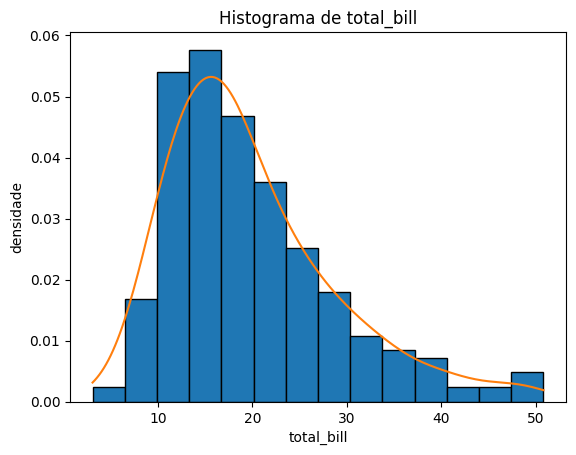

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = dados["total_bill"].dropna()

# Histograma
plt.figure()
plt.hist(x, bins="auto", density=True, edgecolor="black")
kde = gaussian_kde(x)
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, kde(xs))
plt.xlabel("total_bill"); plt.ylabel("densidade"); plt.title("Histograma de total_bill")
plt.show()

**Item 6** - Escolha duas variáveis númericas e averigue a relação de dispersão, demonstrando visualmente. Comente se há indicios e qual o tipo da correlação.

**Item 7** - Demonstre graficamente o resumo da distribuição de uma variável númerica. Identifique se existem _outliers_, explicando possíveis causas ou hipóteses para esses valores.

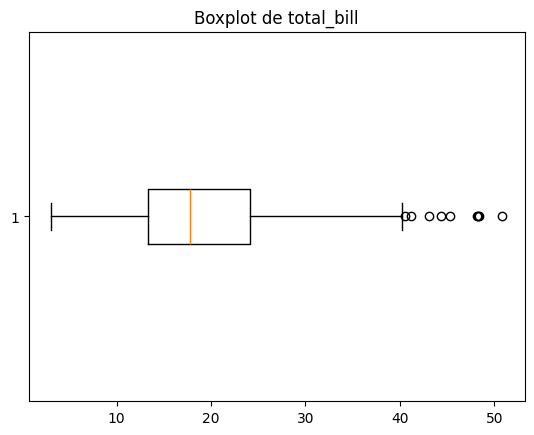

In [ ]:
# Boxplot
plt.figure()
plt.boxplot(x, vert=False, showfliers=True)
plt.title("Boxplot de total_bill")
plt.show()

O boxplot de total_bill evidencia a mediana, os quartis e pontos fora dos limites, que representam possíveis outliers. Observam-se valores elevados que estão localizados mais nas extremidades, os quais possivelmente estão relacionados a mesas grandes ou consumo de pratos mais caros, e valores baixos que podem estar associados a contas individuais ou consumo mais reduzido.

**Item 8** - Agrupe os dados por uma variável categórica e calcule a média de uma variável numérica para cada grupo.  
    - Mostre a tabela resultante.  
    - Plote em gráfico de barras.  
    - Descreva as diferenças encontradas entre os grupos.

    day  total_bill
0   Fri   17.151579
1   Sat   20.441379
2   Sun   21.410000
3  Thur   17.682742


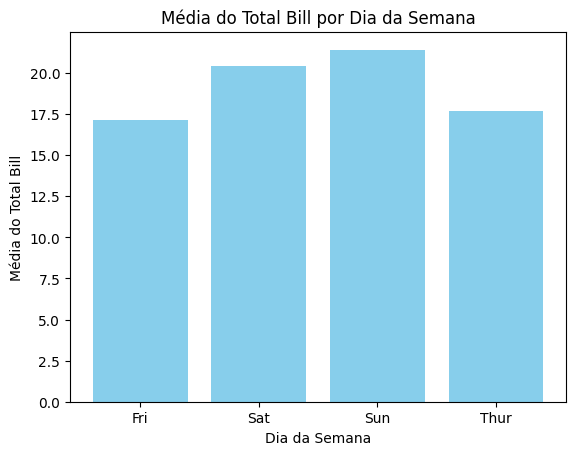

In [ ]:
# Agrupando pelo dia e calculando a média de total_bill
tabela_media_dia = dados.groupby("day")["total_bill"].mean().reset_index()


print(tabela_media_dia)

# Gráfico de barras
plt.bar(tabela_media_dia["day"], tabela_media_dia["total_bill"], color="skyblue")
plt.xlabel("Dia da Semana")
plt.ylabel("Média do Total Bill")
plt.title("Média do Total Bill por Dia da Semana")
plt.show()


A análise mostra que o maior valor médio de total_bill ocorreu no domingo (21.41), seguido pelo sábado (20.44). Já as menores médias foram observadas na quinta-feira (17.68) e na sexta-feira (17.15). Isso pode ocorrer devido ao fato de que nos finais de semana há mais pessoas e, provavelmente, mais clientes por mesa, justamente por ser fim de semana

**Item 9** - Calcule a matriz de correlação para as variáveis numéricas e visualize-a como mapa de calor.
Identifique quais pares de variáveis apresentam maior e menor correlação.

**Item 10** - Baseado na exploração da base de dados a partir itens anteriores, desenvolva um mini-relatório (até 5 linhas) descrevendo a temática do conjunto, o que pode ser observado e interpretado.  
**(Não obrigatório)** Caso necessário implemente mais etapas de exploração.